In [15]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import pandas as pd
import scipy

rc('font', family=['NanumGothic'])
plt.rcParams['axes.unicode_minus'] = False

In [3]:
def get_initial_velocity(theta, D, H_s):
    g = scipy.constants.g
    d_l =  H_s / np.tan(theta)
    ret = np.full_like(D, np.inf, dtype=float)
    mask = D > d_l
    ret[mask] = D[mask]
    temp = np.sqrt(g / (2 * (ret * np.tan(theta) - H_s)))
    ret = np.multiply((ret / np.cos(theta)), temp)
    return ret

In [4]:
print(get_initial_velocity(np.pi/2 * 0.8, np.array([0.01, 0.1, 1]), 1))

[       nan        nan 4.97133783]


C:\Users\jskim\AppData\Local\Temp\ipykernel_23132\2654672166.py:8: RuntimeWarning: invalid value encountered in multiply
  ret = np.multiply((ret / np.cos(theta)), temp)


# 상수 정의

In [5]:
L = 3.6575 # 경기장 한 변 길이 (m)
H = 0.9845 # 골대의 높이 (m)
h_R = 0.45 # 로봇 높이 (m)
h_s = 0.2 # 골대로 부터 목표 점까지 높이 차 (m)
spot = (L * 4 / 9 , H + h_s, L * 4 / 9) # 목표 점 좌표 => 무게 중심
theta = np.pi / 2 * 0.8 # 공을 던지는 각도 (rad)

# 계산

## 큰 삼각형

In [6]:
big_X, big_Z = [], []

for z in np.arange(L/2 - 0.05, 0 - 0.05, -0.05):
    for x in np.arange(-z, z + 0.05, 0.05):
        big_X.append(x)
        big_Z.append(z)

big_X = np.array(big_X)
big_Z = np.array(big_Z)
big_D = np.sqrt((spot[0] - big_X) ** 2 + (spot[2] - big_Z) ** 2)
big_v = get_initial_velocity(theta, big_D, H - h_R + h_s)

C:\Users\jskim\AppData\Local\Temp\ipykernel_23132\2654672166.py:8: RuntimeWarning: invalid value encountered in multiply
  ret = np.multiply((ret / np.cos(theta)), temp)


c:\Python313\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
c:\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


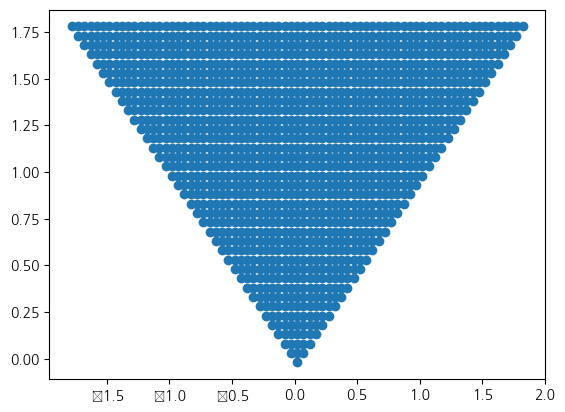

In [7]:
plt.scatter(big_X, big_Z)

## 작은 삼각형

In [16]:
small_X, small_Z = [], []

for z in np.arange(-L/3, -L/2-0.05, -0.05):
    for x in np.arange(z + L/3, -z - L/3 + 0.05, 0.05):
        small_X.append(x)
        small_Z.append(z)

small_X = np.array(small_X)
small_Z = np.array(small_Z)
small_D = np.sqrt((spot[0] - small_X) ** 2 + (spot[2] - small_Z) ** 2)
small_v = get_initial_velocity(theta, small_D, H - h_R + h_s)

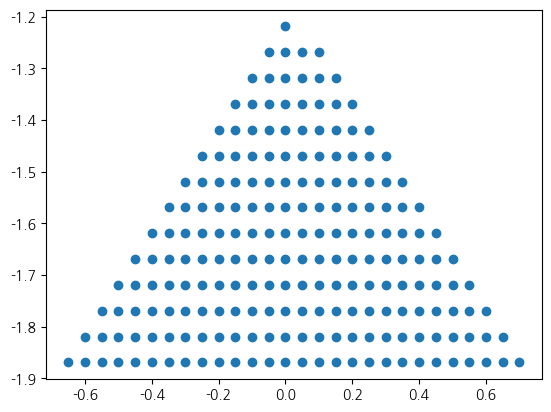

In [17]:
plt.scatter(small_X, small_Z)

# 시각화

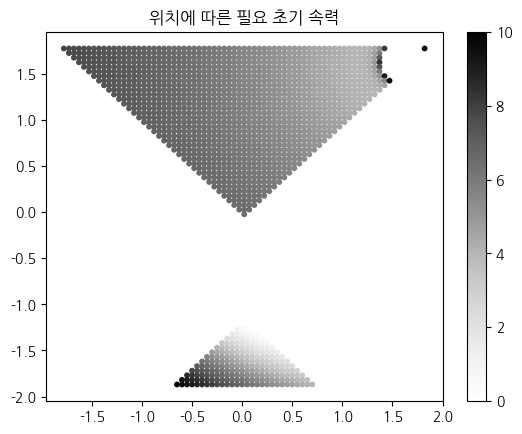

In [18]:

plt.title("위치에 따른 필요 초기 속력")
plt.scatter(small_X, small_Z, c=small_v, cmap='Greys', s=10)
plt.scatter(big_X, big_Z, c=big_v, cmap='Greys', s=10)
plt.colorbar()
plt.clim(0, 10)